In [47]:
# Let's start with importing necessary libraries for prediction of House pricing data in Boston
import numpy as np
import pandas as pd
import pickle
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
#import statsmodels.api as sm 
boston=load_boston()


In [48]:
#finding the boston data dictionaru
boston.keys()
#boston.filename



dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [49]:
#introducting column names  and target as price
df = pd.DataFrame(boston.data)
df.columns=boston.feature_names
df['PRICE']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2



Exploratory Data Analysis   
#As there is lot of skewness in the features using below

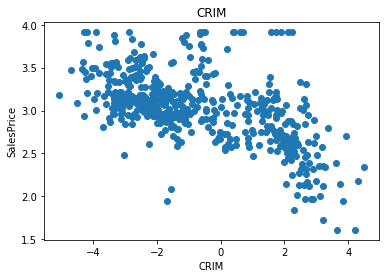

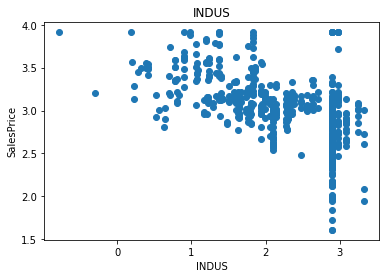

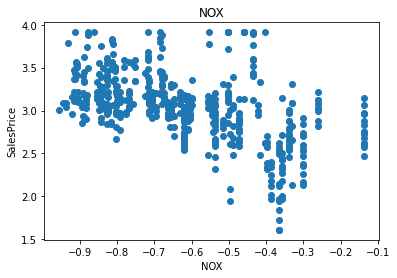

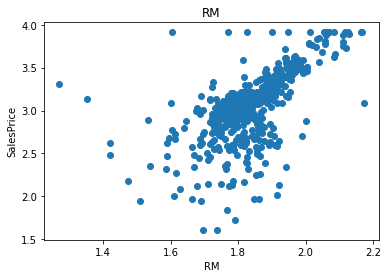

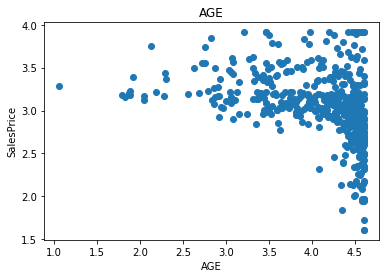

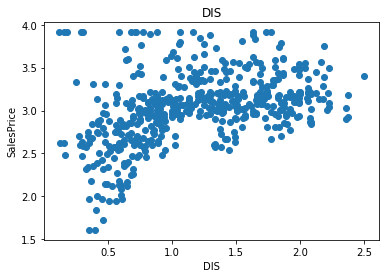

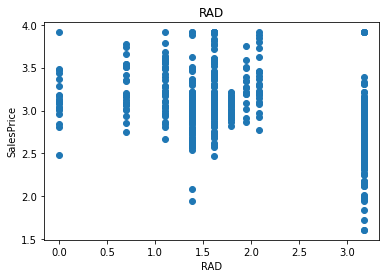

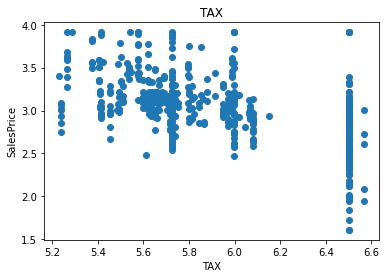

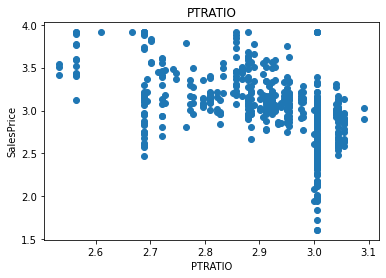

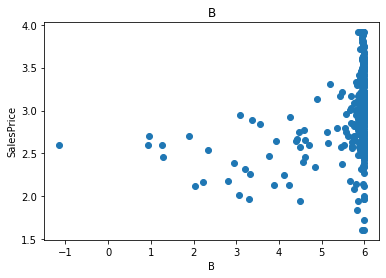

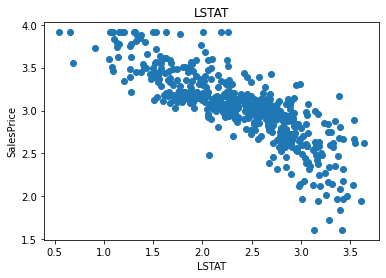

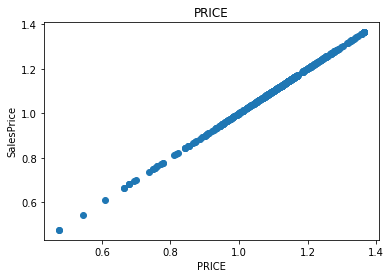

In [50]:
## We will be using logarithmic transformation


for feature in df:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['PRICE']=np.log(data['PRICE'])
        plt.scatter(data[feature],data['PRICE'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

# Outliers

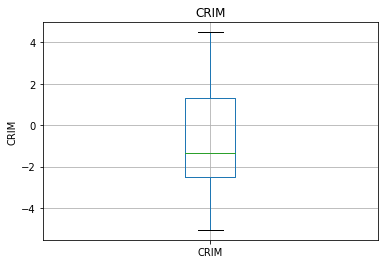

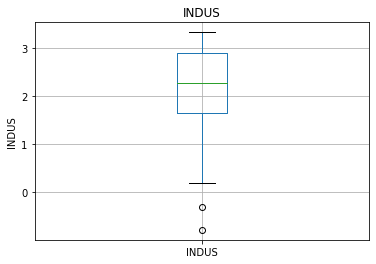

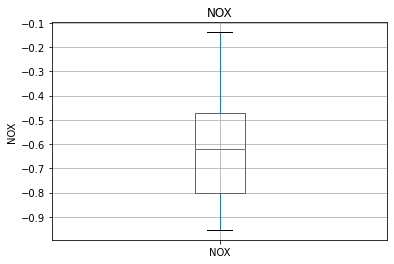

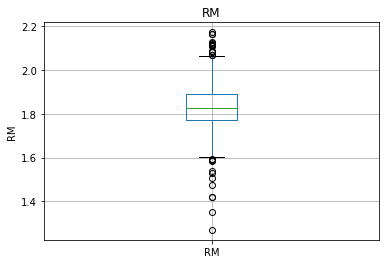

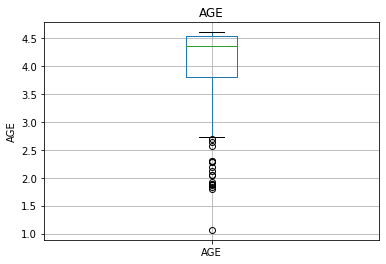

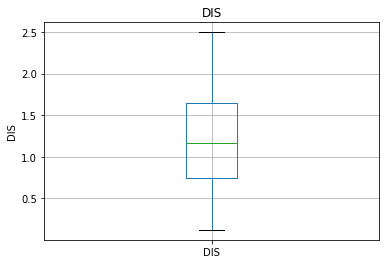

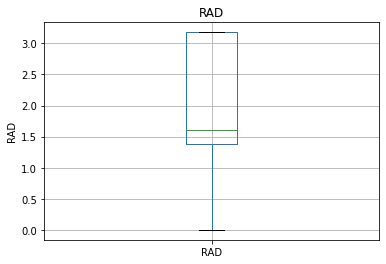

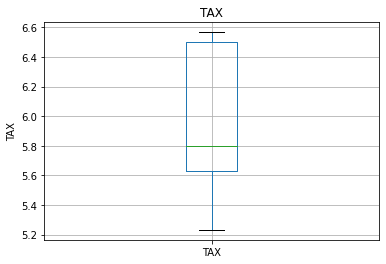

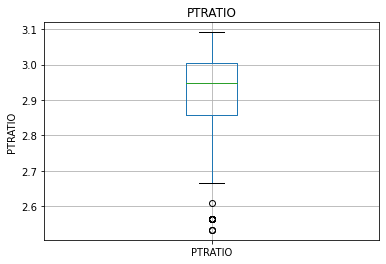

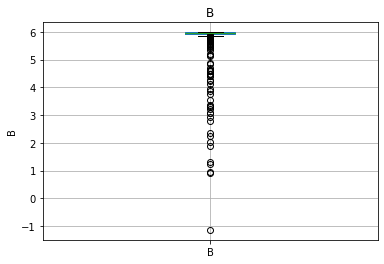

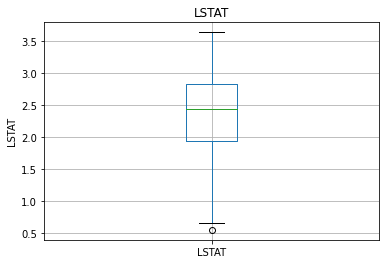

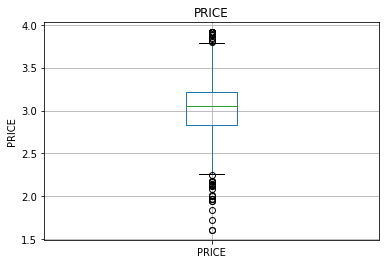

In [51]:
for feature in df:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [52]:
y1=data['PRICE']
X1=data.drop(columns =['PRICE'])

[0.05569946 0.00222311 0.02635672 0.01067999 0.06001458 0.18420152
 0.02215105 0.03520245 0.03108277 0.08290955 0.05322151 0.02439755
 0.41185973]


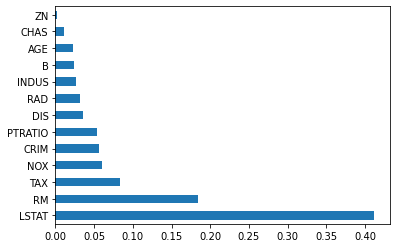

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

model=ExtraTreesRegressor()
model.fit(X1,y1)
ExtraTreesRegressor(random_state=101)
print(model.feature_importances_)
pd.Series(model.feature_importances_, index = X1.columns).nlargest(13).plot(kind = 'barh')
plt.show()
X1.columns

In [12]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) < threshold : # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
                
    return col_corr

In [13]:
corr_features = correlation(df, -0.7)
len(set(corr_features))

0

In [18]:
corr_features
df.drop(columns=corr_features,axis=1,inplace=True)
X=df

In [54]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold : # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
                
    return col_corr

In [55]:
corr_features = correlation(X1, 0.7)
len(set(corr_features))

4

In [56]:
corr_features
#df.drop(columns=corr_features,axis=1,inplace=True)
#X=df

{'AGE', 'DIS', 'NOX', 'TAX'}

In [57]:
df.drop(columns=['AGE', 'DIS', 'TAX'],axis=1,inplace=True)
X1=df

In [34]:
X1.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,RAD,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,1.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,2.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,2.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,3.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,3.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,3.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,5.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,5.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,5.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,5.0,15.2,386.71,17.10,18.9


In [58]:
X1=df.drop(columns =['PRICE'], axis=1)
y1=df['PRICE']

#Let us check multicolinearity

A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression
coefficient is inflated due to multicollinearity in the model.

VIF=1/(1−R2)
Where R Squared is coefficient of determination

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled


# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()
vif["Features"] = X1.columns
# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result

vif

,Features,VIF
0,CRIM,1.698895
1,ZN,1.696833
2,INDUS,2.909955
3,CHAS,1.042538
4,NOX,3.548919
5,RM,1.817870
6,RAD,2.831975
7,PTRATIO,1.815671
8,B,1.299328
9,LSTAT,2.673449


In [59]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X1,
    y1,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((354, 10), (152, 10))

In [45]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
X_scaled = x_scaler.fit_transform(X_train)
y_scaler = StandardScaler()
#y_scaled = y_scaler.fit_transform(y_train.reshape(-1,1))

In [60]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

https://www.kaggle.com/tolgahancepel/boston-housing-regression-analysis
sns.regplot() function to get the best fit line of your model in a graph. 

In [62]:
coefficients = pd.DataFrame(lm.coef_,X1.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
CRIM,-0.093928
ZN,-0.010154
INDUS,0.031860
CHAS,2.996012
NOX,-7.490964
RM,4.615257
RAD,0.075796
PTRATIO,-1.202382
B,0.008312
LSTAT,-0.448487


In [64]:
from sklearn import metrics
from sklearn.metrics import r2_score


# Predicting R2 Score the Train set results
y_pred_linear_train = lm.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = lm.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear_test)))
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

R2_score (train):  0.7300912573479021
R2_score (test):  0.6218898313410552
RMSE:  5.611018879879401


Text(0, 0.5, 'Predicted Y')

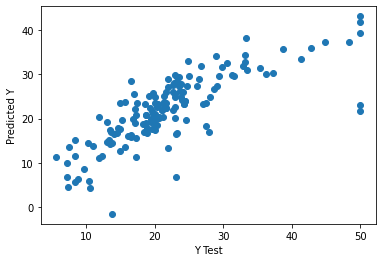

In [21]:
plt.scatter(y_test,y_pred_linear_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [65]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_linear_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_linear_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear_test)))

MAE: 3.8808500449658645
MSE: 31.483532870363085
RMSE: 5.611018879879401


# Polynomial Regression - 2nd degree

In [66]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [67]:
from sklearn import metrics
from sklearn.metrics import r2_score

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly2_test)))

print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

R2_score (train):  0.8609609715030586
R2_score (test):  0.5027087430406985
RMSE:  6.434843119630655


# Ridge Regression 

In [68]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=3.8))])

In [69]:
from sklearn.metrics import r2_score
from sklearn import metrics

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge_test)))

print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

R2_score (train):  0.9132931475312505
R2_score (test):  0.7179720381176082
RMSE:  4.845946731442687


# Lasso Regression 

In [70]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.012, max_iter=3000))])

In [71]:
# from sklearn.metrics import r2_score
from sklearn import metrics

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso_test)))

print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

R2_score (train):  0.9129526371737375
R2_score (test):  0.7085572375557263
RMSE:  4.926167660123874


In [72]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test)]

In [73]:
compare_score = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(Training)', 'R2_Score(Test)'])
compare_score 

,Model,RMSE,R2_Score(Training),R2_Score(Test)
0,Linear Regression,5.611019,0.730091,0.621890
1,Polynomial Regression (2nd),6.434843,0.860961,0.502709
2,Ridge Regression,4.845947,0.913293,0.717972
3,Lasso Regression,4.926168,0.912953,0.708557
